In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [3]:
data = pd.read_csv("../insurance_dataset.csv") 
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Le tableau se compose de :
    * données catégorielles: genre (male/female), smoker (yes/no)
    * variable quantitative continue: charges et bmi
    * variable qualitative: region
    * variable quantitative discréte: nombre d'enfants 


In [4]:
data.isnull().values.any() #verifier si il y a des valeurs nulles dans le dataframe

False

In [5]:
data.describe()[['age', 'bmi', 'children', 'charges']]

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.describe()[['age']]

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [9]:
data.describe()[['bmi']]

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [18]:
data['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

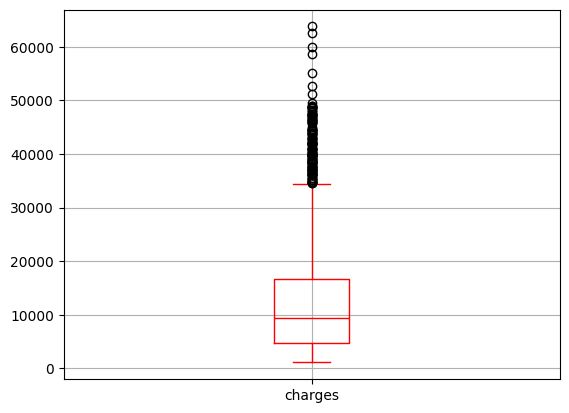

In [7]:
#data_plot = data.boxplot(column = ['age', 'bmi']) 
data_plot = data.boxplot(column = ['charges'], color = "red") 

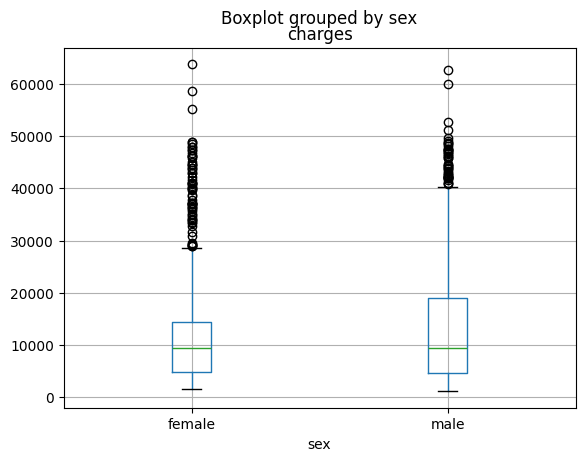

In [38]:
data.boxplot(column = "charges", by='sex')
plt.show()

In [41]:
charges_region = data.groupby('region')['charges'].mean()
charges_region

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [1]:
data.groupby('region')['bmi'].mean().plot(kind='bar')
plt.xlabel('regions')
plt.ylabel('charges')

NameError: name 'data' is not defined

In [46]:
smok_charge = data.groupby('smoker')['charges'].mean()
smok_charge

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

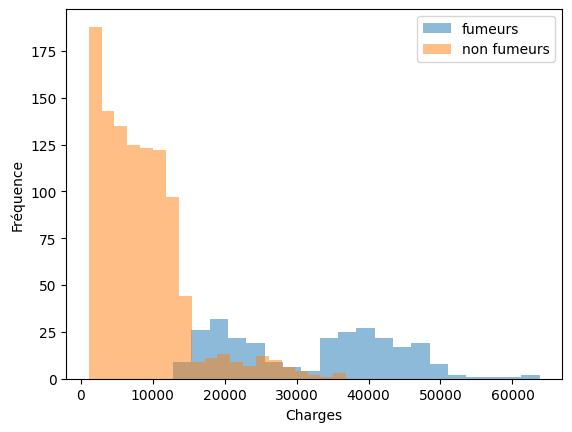

In [56]:
smok_charge_bar = data[data['smoker'] == 'yes']['charges']
non_smok_charge_bar = data[data['smoker'] == 'no']['charges']

plt.hist(smok_charge_bar, alpha = 0.5, label = "fumeurs", bins = 20)
plt.hist(non_smok_charge_bar, alpha = 0.5, label = "non fumeurs", bins = 20)

plt.xlabel('Charges')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

In [58]:
bmi_charge = data.groupby('bmi')['charges'].mean()
bmi_charge

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges, Length: 548, dtype: float64

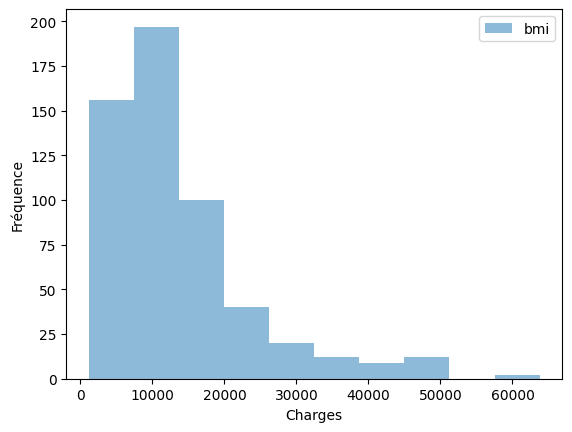

In [59]:
#smok_charge_bar = data[data['smoker'] == 'yes']['charges']
#non_smok_charge_bar = data[data['smoker'] == 'no']['charges']

plt.hist(bmi_charge, alpha = 0.5, label = "bmi")

plt.xlabel('Charges')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

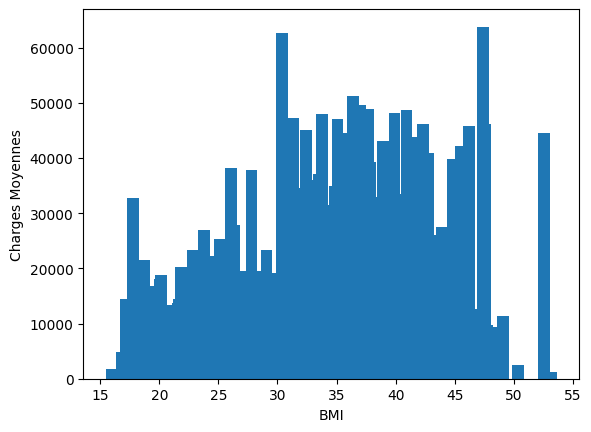

In [60]:
bmi_charge = data.groupby('bmi')['charges'].mean().reset_index()

plt.bar(bmi_charge['bmi'], bmi_charge['charges'], width=1.0)

plt.xlabel('BMI')
plt.ylabel('Charges Moyennes')

plt.show()

In [ ]:
#creer classes pour le bmi afin de faciliter <19, 19-25, 25-30, 30-35, 35<